# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"]  
        city_max_temp = city_weather["main"]["temp_max"]  
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]  
        city_wind = city_weather["wind"]["speed"]  
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | la passe
Processing Record 4 of Set 1 | mogocha
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | nova vicosa
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | freetown
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | sinjai
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | kataragama
City not found. Skipping...
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | kili
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | wait

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,58.28,66,96,7.11,RU,1724786423
1,blackmans bay,-43.0167,147.3167,46.53,88,100,1.99,AU,1724786424
2,la passe,45.5549,-0.8967,70.74,59,67,10.49,FR,1724786425
3,mogocha,53.7333,119.7667,57.79,97,100,3.44,RU,1724786426
4,nova vicosa,-17.8919,-39.3719,72.86,76,100,15.52,BR,1724786429


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,58.28,66,96,7.11,RU,1724786423
1,blackmans bay,-43.0167,147.3167,46.53,88,100,1.99,AU,1724786424
2,la passe,45.5549,-0.8967,70.74,59,67,10.49,FR,1724786425
3,mogocha,53.7333,119.7667,57.79,97,100,3.44,RU,1724786426
4,nova vicosa,-17.8919,-39.3719,72.86,76,100,15.52,BR,1724786429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

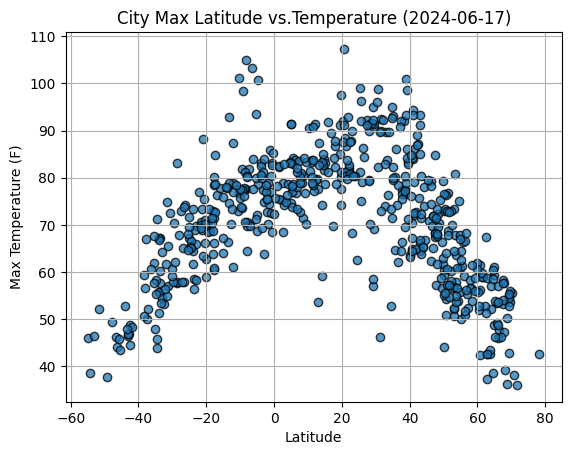

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs.Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

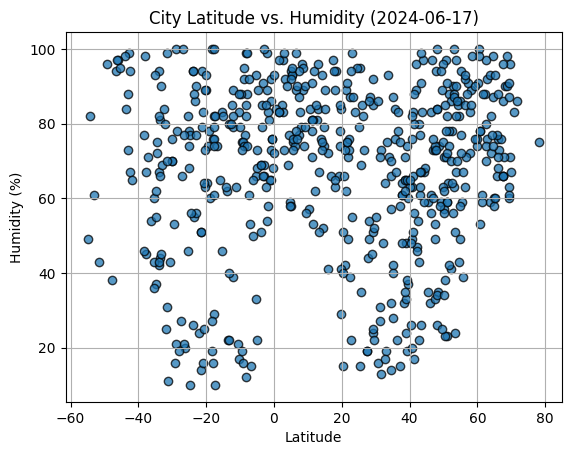

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)   

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

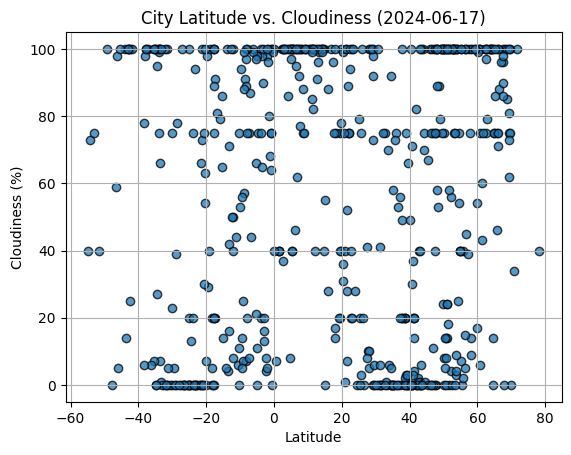

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

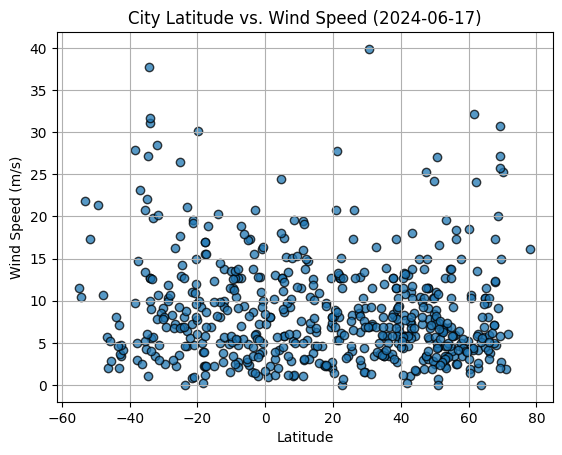

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)  

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linreg(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = rvalue**2
    print(f"The r^2-value is: {r_squared}")
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,58.28,66,96,7.11,RU,1724786423
2,la passe,45.5549,-0.8967,70.74,59,67,10.49,FR,1724786425
3,mogocha,53.7333,119.7667,57.79,97,100,3.44,RU,1724786426
7,freetown,8.4840,-13.2299,80.31,89,75,19.57,SL,1724786432
9,albany,42.6001,-73.9662,87.24,54,2,1.01,US,1724786434


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,46.53,88,100,1.99,AU,1724786424
4,nova vicosa,-17.8919,-39.3719,72.86,76,100,15.52,BR,1724786429
5,chonchi,-42.6128,-73.8092,48.67,67,100,3.42,CL,1724786430
6,adamstown,-25.0660,-130.1015,67.24,68,100,17.72,PN,1724786431
8,papatowai,-46.5619,169.4708,46.17,94,59,5.70,NZ,1724786433


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.47580821282597013


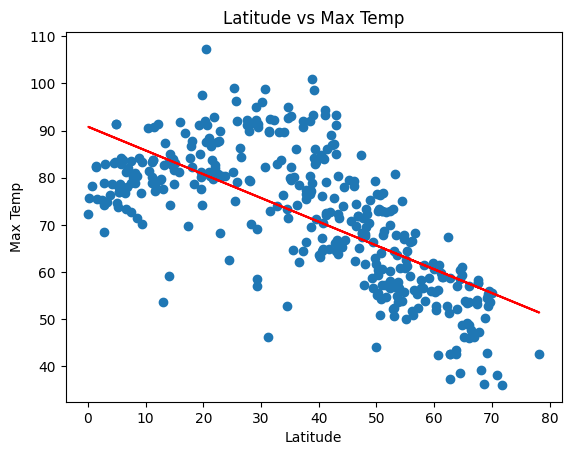

In [21]:
# Linear regression on Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp",(5,-30))

The r^2-value is: 0.6268214853455857


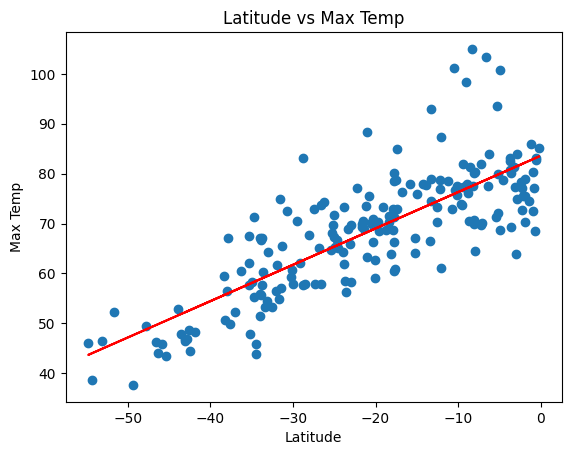

In [23]:
# Linear regression on Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp",(-30,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northen hemisphere it can be seen that there is a inverse relationship a city's latitude and Max temperature. This means that as the cities latitude increases there is a higher likelihood that the city will have a lower max temperature. This would make sense as the lower the latituse the close to the equator which is going to be hotter. Similarly, on the southern hemisphere there is a direct relationship between a city's latitude an its maximum temerature. This means that as a city's latitude increases then the probability of it having a higher maximum temperature also increases. This is concurrent with the data from the northern hemisphere as the lat is flipped.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0006568748068596646


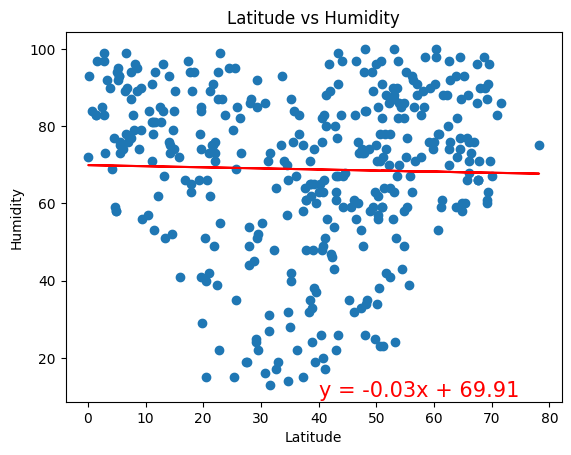

In [24]:
# Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity",(40,10))

The r^2-value is: 0.0006523618614715936


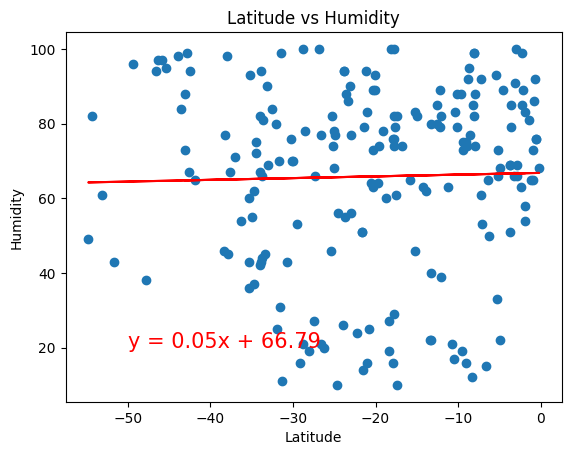

In [25]:
# Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity",(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based upon the r^2 values for both of the graphs there is no significant relationship between a city's lat and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.004327503328931492


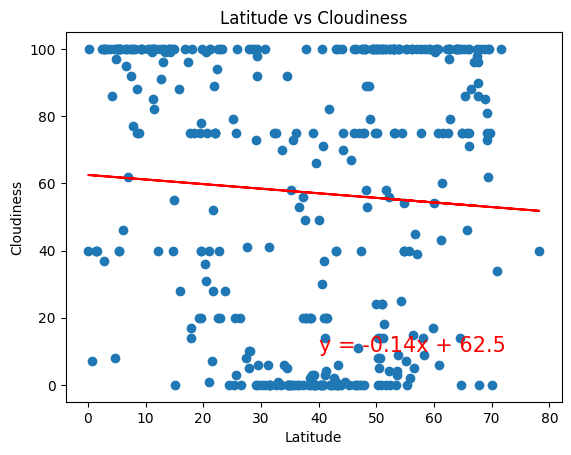

In [26]:
# Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness",(40,10))

The r^2-value is: 0.0009574032085075511


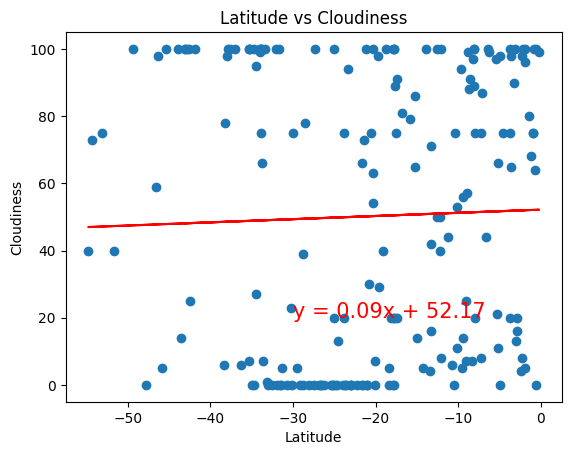

In [27]:
# Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness",(-30,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based upon the r^2 values for both of the graphs there is no significant relationship between a city's lat and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.00018687129794792913


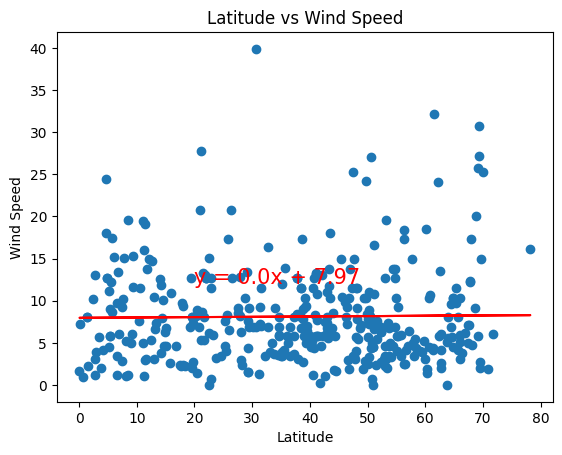

In [28]:
# Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed",(20,12))

The r^2-value is: 0.01868195389961412


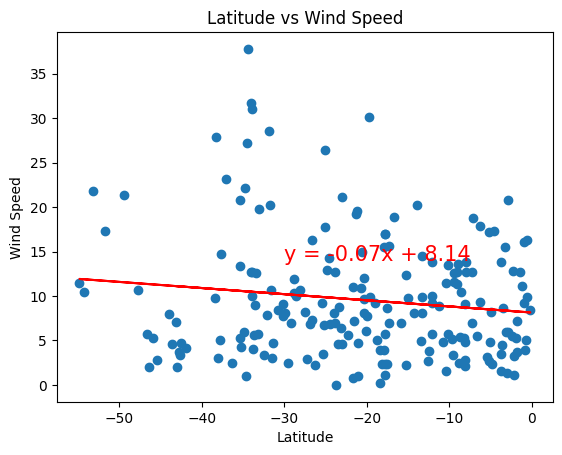

In [30]:
# Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed",(-30,14))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based upon the r^2 values for both of the graphs there is no significant relationship between a city's lat and wind speed.